In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the Excel file
df = pd.read_excel(r'C:\Users\HP 1030 G4\Downloads\SampleData.xlsx', sheet_name='SalesOrders')

# Display the first few rows of the dataframe
print(df.head())




   OrderDate   Region      Rep    Item  Units  Unit Cost   Total
0 2021-01-06     East    Jones  Pencil     95       1.99  189.05
1 2021-01-23  Central   Kivell  Binder     50      19.99  999.50
2 2021-02-09  Central  Jardine  Pencil     36       4.99  179.64
3 2021-02-26  Central     Gill     Pen     27      19.99  539.73
4 2021-03-15     West  Sorvino  Pencil     56       2.99  167.44


In [181]:
print(df.describe())
pd.options.mode.copy_on_write = True

                 OrderDate      Units   Unit Cost        Total
count                   43  43.000000   43.000000    43.000000
mean   2021-12-29 00:00:00  49.325581   20.308605   456.462326
min    2021-01-06 00:00:00   2.000000    1.290000     9.030000
25%    2021-07-03 12:00:00  27.500000    3.990000   144.590000
50%    2021-12-29 00:00:00  53.000000    4.990000   299.400000
75%    2022-06-25 12:00:00  74.500000   17.990000   600.180000
max    2022-12-21 00:00:00  96.000000  275.000000  1879.060000
std                    NaN  30.078248   47.345118   447.022104


In [182]:
# Filter the DataFrame
filtered_df = df[df['Units'] > 80]

# Create the 'Impact' column
filtered_df['Impact'] = filtered_df['Units'].apply(lambda x: 'High' if x > 90 else 'Low')


print(filtered_df)

    OrderDate   Region      Rep     Item  Units  Unit Cost    Total Impact
0  2021-01-06     East    Jones   Pencil     95       1.99   189.05   High
7  2021-05-05  Central  Jardine   Pencil     90       4.99   449.10    Low
10 2021-06-25  Central   Morgan   Pencil     90       4.99   449.10    Low
12 2021-07-29     East   Parent   Binder     81      19.99  1619.19    Low
19 2021-11-25  Central   Kivell  Pen Set     96       4.99   479.04   High
23 2022-02-01  Central    Smith   Binder     87      15.00  1305.00    Low
28 2022-04-27     East   Howard      Pen     96       4.99   479.04   High
41 2022-12-04  Central  Jardine   Binder     94      19.99  1879.06   High


In [183]:
filtered_df.to_excel('filtered_data.xlsx', index=False)

#my heading

In [184]:
filtered_df.tail()


,OrderDate,Region,Rep,Item,Units,Unit Cost,Total,Impact
12,2021-07-29,East,Parent,Binder,81,19.99,1619.19,Low
19,2021-11-25,Central,Kivell,Pen Set,96,4.99,479.04,High
23,2022-02-01,Central,Smith,Binder,87,15.00,1305.00,Low
28,2022-04-27,East,Howard,Pen,96,4.99,479.04,High
41,2022-12-04,Central,Jardine,Binder,94,19.99,1879.06,High


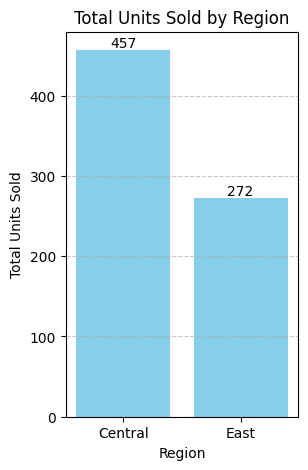

In [185]:
region_units = filtered_df.groupby('Region')['Units'].sum().reset_index()

# Plot the bar chart
plt.figure(figsize=(3, 5))
bars =plt.bar(region_units['Region'], region_units['Units'], color='skyblue')
plt.xlabel('Region')
plt.ylabel('Total Units Sold')
plt.title('Total Units Sold by Region')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X position (center of the bar)
        height,  # Y position (height of the bar)
        f'{height}',  # Text (the height value)
        ha='center',  # Horizontal alignment
        va='bottom'   # Vertical alignment (bottom of the text is on top of the bar)
    )

plt.savefig('region_units_chart.png')
plt.show()

In [186]:
#filtered_df
#plt.savefig('region_units_chart.png')

# What i will show in below block

In [187]:
filtered_df.head()

,OrderDate,Region,Rep,Item,Units,Unit Cost,Total,Impact
0,2021-01-06,East,Jones,Pencil,95,1.99,189.05,High
7,2021-05-05,Central,Jardine,Pencil,90,4.99,449.10,Low
10,2021-06-25,Central,Morgan,Pencil,90,4.99,449.10,Low
12,2021-07-29,East,Parent,Binder,81,19.99,1619.19,Low
19,2021-11-25,Central,Kivell,Pen Set,96,4.99,479.04,High


In [188]:
filtered_df.columns

Index(['OrderDate', 'Region', 'Rep', 'Item', 'Units', 'Unit Cost', 'Total',
       'Impact'],
      dtype='object')

In [189]:
filtered_df = filtered_df[['OrderDate', 'Region', 'Rep', 'Item', 'Units', 'Impact', 'Unit Cost', 'Total',
       ]]

In [190]:
filtered_df.head()

,OrderDate,Region,Rep,Item,Units,Impact,Unit Cost,Total
0,2021-01-06,East,Jones,Pencil,95,High,1.99,189.05
7,2021-05-05,Central,Jardine,Pencil,90,Low,4.99,449.10
10,2021-06-25,Central,Morgan,Pencil,90,Low,4.99,449.10
12,2021-07-29,East,Parent,Binder,81,Low,19.99,1619.19
19,2021-11-25,Central,Kivell,Pen Set,96,High,4.99,479.04
